## Perceptron - Influencer

### Import der benötigten Bibliotheken

In [68]:
import numpy as np
import matplotlib.pyplot as plt

### Definition der Gewichte und des Lernfaktors

In [69]:
w=[0.0,0.0,0.0] #weights x0, x1, x2
alpha = 0.5 #learningfactor
data=[[20,110,1],[40,130,0]] #Datenvector

### Hilfsfunktionen


#### a) Resetfunktion  der Gewichte

In [70]:
# set weights to null
def reset(w):
    for i in range(len(w)):
        w[i]=0.0

In [71]:
reset(w)

#### b) Rohsumme aus den Vektoren

In [72]:
# Definition - the input vector and the weight vector are the same size
def rawsum(input, w):
    result = 0
    for i in range(len(input)):
        result = result + input[i]*w[i]
    return result

#### c) Lernalgorithmus

In [ ]:
# Learningalgorithm    
def learn(input, w):
    #adjust the input with the bias neuron value 1
    newlist = [[1] + sublist for sublist in input] 
    for sublist in newlist:
        x=sublist[0:-1] # x contains only the three first entries of the sublists
        *ignore, d=sublist[-1:] # insert the expectet value to variable d
        result = rawsum(x, w) # calculate the rawsum
        y= 1 if result >=0 else 0 # calulate the heavyside function
        #adjust the weights
        for i in range(len(w)):
          w[i]=w[i]+alpha*x[i]*(d-y)  
    print("Die Gewichte (Bias, Alter, IQ) sind", w)      
    return w

#### d) Wertvorhersage Funktion

In [74]:
# Prediction
def predict(input,w):
    newlist = [1] +input[:len(input)-1]
    result=0
    result = rawsum(input, w)
    y= 1 if result >=0 else 0
    return y

### Lernzyklus

#### Erster Lernzyklus

In [75]:
learn(data,w)

Die Gewichte (Bias, Alter, IQ) sind [-0.5, -20.0, -65.0]


[-0.5, -20.0, -65.0]

#### Zwanzig weitere Lernzyklen

In [76]:
for j in range(20):
    learn(data,w)

Die Gewichte (Bias, Alter, IQ) sind [0.0, -10.0, -10.0]
Die Gewichte (Bias, Alter, IQ) sind [0.0, -20.0, -20.0]
Die Gewichte (Bias, Alter, IQ) sind [0.0, -30.0, -30.0]
Die Gewichte (Bias, Alter, IQ) sind [0.0, -40.0, -40.0]
Die Gewichte (Bias, Alter, IQ) sind [0.0, -50.0, -50.0]
Die Gewichte (Bias, Alter, IQ) sind [0.5, -40.0, 5.0]
Die Gewichte (Bias, Alter, IQ) sind [0.5, -50.0, -5.0]
Die Gewichte (Bias, Alter, IQ) sind [0.5, -60.0, -15.0]
Die Gewichte (Bias, Alter, IQ) sind [0.5, -70.0, -25.0]
Die Gewichte (Bias, Alter, IQ) sind [0.5, -80.0, -35.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die Gewichte (Bias, Alter, IQ) sind [1.0, -70.0, 20.0]
Die

### Entscheidungsgerade

Die Gewichte ändern sich nicht mehr. Wir erhalten die Ungleichuchung, die entscheidet, ob ein Datenpunkt zu den Influencer Followern gehört oder nicht.

$$ +1 -7\cdot \text{Alter} +20\cdot \text{IQ} \geq 0$$

Mit x = Alter und y = IQ folgt:
$$ +1 -7\cdot x +20\cdot y \geq 0$$

Umformung der Ungleichung nach y ergibt:
$$ y\geq 3,5x-\frac{1}{20}$$

Als Grenzgerade erhält man:
$$ y = 3,5x-\frac{1}{20}$$

#### Veranschaulichung

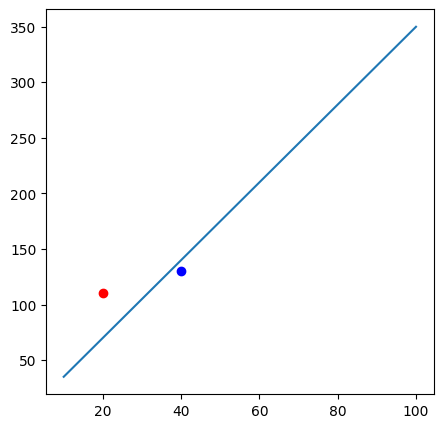

In [77]:
# Definitionsmenge und Funktion
# ----------------------------
x = np.linspace(10, 100,100)
y= -1/20 + 3.5*x
# ----------------------------

# Einstellung des Graphen
fig=plt.figure(figsize=(5,5))

ax= fig.add_subplot(1,1,1)

# Plot der Funktion
ax.plot(x,y)
#Plot der Datenpunkte
for sublist in data:
     if sublist[2]== 1:
          cl = "red"
     else:
          cl ="blue"
     ax.plot(sublist[0], sublist[1], "o", color=cl) #Punkt einzeichnen